In [145]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt



data= pd.read_csv('time-series-19-covid-combined.csv')
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [146]:
turkey_data = data[data['Country/Region'] == 'Turkey']
afghanistan_data= data[data['Country/Region'] == 'Afghanistan']
china_data= data[data['Country/Region'] == 'China']
germany_data =  data[data['Country/Region'] == 'Germany']

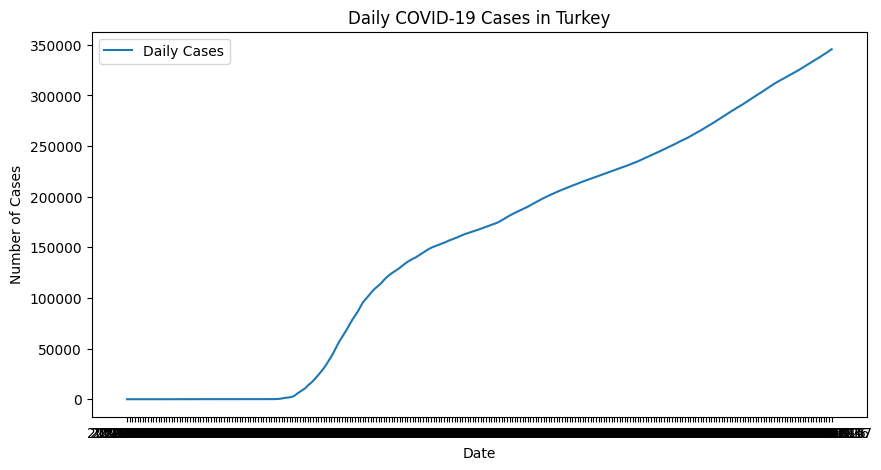

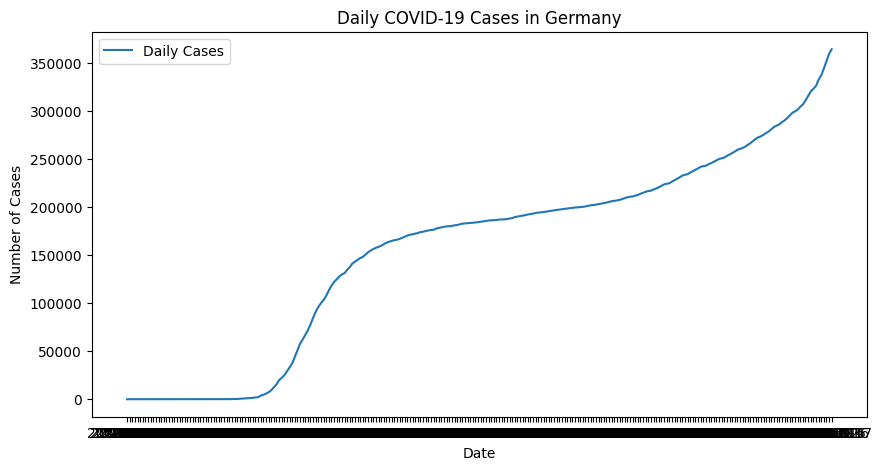

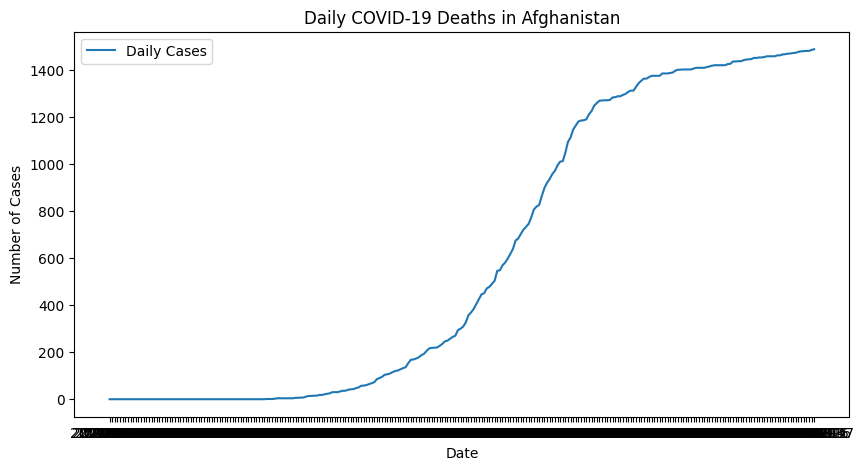

In [147]:
plt.figure(figsize=(10, 5))
plt.plot(turkey_data['Date'], turkey_data['Confirmed'],  label='Daily Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily COVID-19 Cases in Turkey')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(germany_data['Date'], germany_data['Confirmed'],  label='Daily Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily COVID-19 Cases in Germany')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(afghanistan_data['Date'], afghanistan_data['Deaths'],  label='Daily Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily COVID-19 Deaths in Afghanistan')
plt.legend()
plt.show()


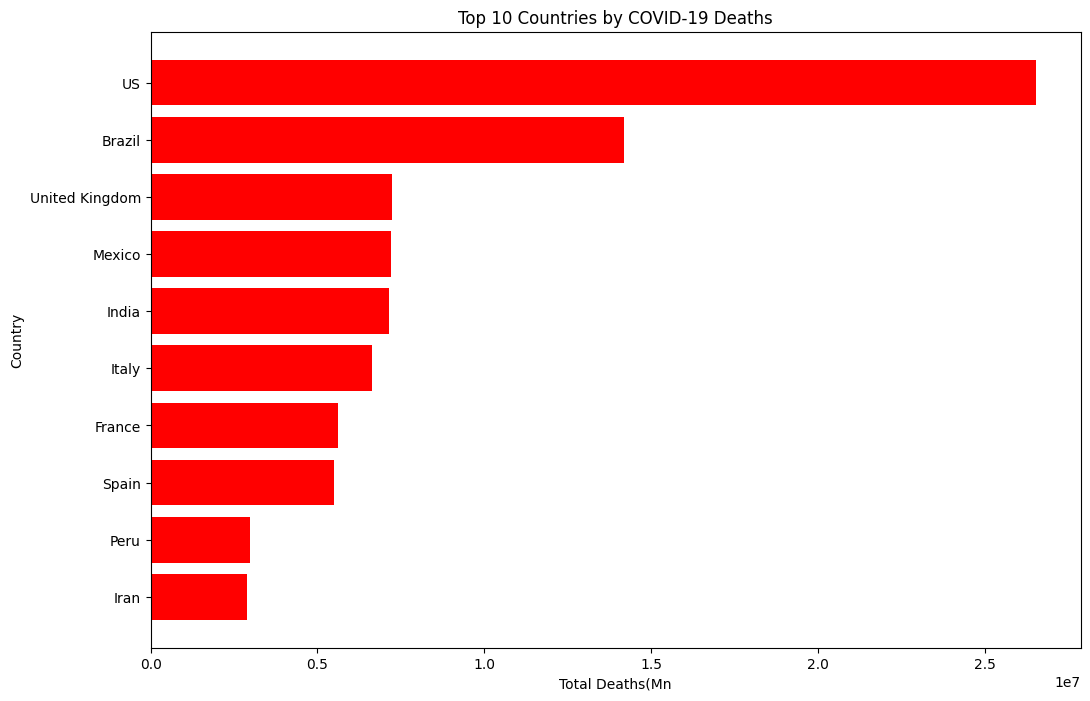

In [148]:
import seaborn as sns
# Group by 'Country/Region' and sum the 'Deaths' column
country_deaths = data.groupby('Country/Region')['Deaths'].sum().reset_index()

# Sort the countries by the total number of deaths in descending order
top_10_countries = country_deaths.sort_values(by='Deaths', ascending=False).head(10)

# Plot the top 10 countries with the most deaths
plt.figure(figsize=(12, 8))
plt.barh(top_10_countries['Country/Region'], top_10_countries['Deaths'], color='red')
plt.xlabel('Total Deaths(Mn')
plt.ylabel('Country')
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.gca().invert_yaxis()
plt.show()


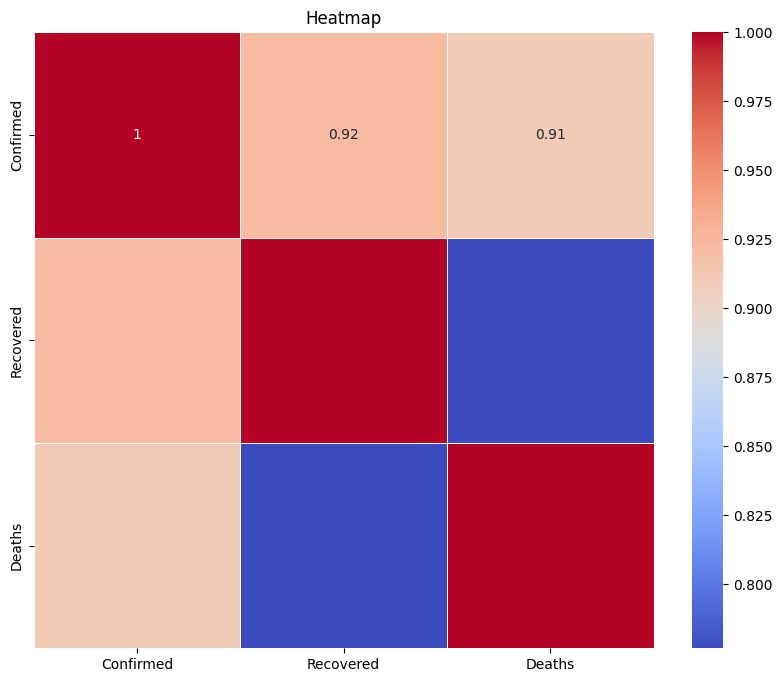

In [149]:
# Korrelasyon matrisine dahil etmeyeceğiniz kolonları belirtin
columns_to_drop = ['Date', 'Province/State', 'Country/Region','Lat','Long']  # Örnek kolonlar

# İlgili kolonları düşürerek korrelasyon matrisini hesaplayın
data_filtered = data.drop(columns=columns_to_drop)
corr_matrix = data_filtered.corr()

# Korrelasyon matrisini heatmap olarak görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap')
plt.show()

In [150]:
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [151]:
#Normalite Tests
import scipy.stats as stats
from scipy.stats import shapiro,normaltest, anderson
#shapiro Test

stats, p_value= shapiro(turkey_data['Confirmed'])
print(f"Shapiro Wilk Test(Confirmed in Turkey): Stat: {stats}, p-value: {p_value}")
stats, p_value= shapiro(germany_data['Recovered'])
print(f"Shapiro Wilk Test(Recovered in Germany): Stat: {stats}, p-value: {p_value}")
stats, p_value= shapiro(afghanistan_data['Deaths'])
print(f"Shapiro Wilk Test(Deaths in Afghanistan): Stat :{stats}, p-value: {p_value}")
print('-----------------------------------------------------------------------')
stat , p_valure= normaltest(turkey_data['Confirmed'])
print(f"D'Agostino' K^2 Test(Confirmed in Turkey): stat: {stat}, p-value: {p_value}")
stat , p_valure= normaltest(china_data['Deaths'])
print(f"D'Agostino' K^2 Test(Deaths in China: stat: {stat}, p-value: {p_value}")
stat , p_valure= normaltest(afghanistan_data['Recovered'])
print(f"D'Agostino' K^2 Test(Rcovered in Afghanistan): stat: {stat}, p-value: {p_value}")
print('-----------------------------------------------------------------------')
result = anderson(data['Confirmed'].dropna())
print("Anderson-Darling Test(Confirmed):")
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}%: {result.statistic:.3f} < {cv:.3f} (Fail to reject H0 - Normal distribution)")
    else:
        print(f"At {sl}%: {result.statistic:.3f} > {cv:.3f} (Reject H0 - Not normal distribution)")

print('Since most of the Confirmed, Deaths, and Recovered columns are not normally distributed, we will use non-parametric tests ')

Shapiro Wilk Test(Confirmed in Turkey): Stat: 0.9019718170166016, p-value: 2.999796374844599e-12
Shapiro Wilk Test(Recovered in Germany): Stat: 0.8737102746963501, p-value: 3.971207924676791e-14
Shapiro Wilk Test(Deaths in Afghanistan): Stat :0.7833146452903748, p-value: 1.2502039831375197e-18
-----------------------------------------------------------------------
D'Agostino' K^2 Test(Confirmed in Turkey): stat: 383.8071846199653, p-value: 1.2502039831375197e-18
D'Agostino' K^2 Test(Deaths in China: stat: 9833.409071749375, p-value: 1.2502039831375197e-18
D'Agostino' K^2 Test(Rcovered in Afghanistan): stat: 2231.0891905268804, p-value: 1.2502039831375197e-18
-----------------------------------------------------------------------
Anderson-Darling Test(Confirmed):
At 15.0%: 22932.159 > 0.576 (Reject H0 - Not normal distribution)
At 10.0%: 22932.159 > 0.656 (Reject H0 - Not normal distribution)
At 5.0%: 22932.159 > 0.787 (Reject H0 - Not normal distribution)
At 2.5%: 22932.159 > 0.918 (Re

In [152]:
from scipy.stats import mannwhitneyu

# Clean data
confirmed = data['Confirmed'].dropna()
recovered = data['Recovered'].dropna()
# Mann-Whitney U Test
stat, p_value = mannwhitneyu(confirmed, recovered, alternative='two-sided')
print(f'Mann-Whitney U Test(Confirmed-Recovered) : p-value = {p_value}')

recovered = data['Recovered'].dropna()
deaths = data['Deaths'].dropna()
stat, p_value = mannwhitneyu(recovered, deaths, alternative = 'two-sided')
print(f"Mann-Whitneyu Test: p-value(Recovered-Deaths): {p_value}")



Mann-Whitney U Test(Confirmed-Recovered) : p-value = 7.089094236835924e-265
Mann-Whitneyu Test: p-value(Recovered-Deaths): 0.0


In [153]:
from scipy.stats import wilcoxon


afghanistan = afghanistan_data['Confirmed']
turkey = turkey_data['Confirmed']
# Wilcoxon Signed-Rank Testi
stat, p_value = wilcoxon(afghanistan, turkey)

print(f'Wilcoxon Signed-Rank Test(Turkey-Afghanistan(Confirmed)): p-değeri = {p_value}')


Wilcoxon Signed-Rank Test(Turkey-Afghanistan(Confirmed)): p-değeri = 2.996960478289186e-39


In [154]:
from scipy.stats import kruskal

# Verilerin temizlenmesi ve gruplandırılması
group1 = turkey_data['Confirmed'][turkey_data['Recovered'] == 'Group1'].dropna()
group2 = afghanistan_data['Confirmed'][afghanistan_data['Recovered'] == 'Group2'].dropna()
group3 = germany_data['Confirmed'][germany_data['Recovered'] == 'Group3'].dropna()

# Kruskal-Wallis H Testi
stat, p_value = kruskal(group1, group2, group3)

print(f'Kruskal-Wallis H Testi sonucu: p-değeri = {p_value}')


Kruskal-Wallis H Testi sonucu: p-değeri = nan


In [155]:
from scipy.stats import friedmanchisquare


time1 = afghanistan_data['Deaths'].dropna()
time2 = turkey_data['Deaths'].dropna()
time3 = germany_data['Deaths'].dropna()

# Friedman Test
stat, p_value = friedmanchisquare(time1, time2, time3)

print(f'Friedman Test(Deaths of Turkey, Germany and Afghanistan): p-değeri = {p_value}')


Friedman Test(Deaths of Turkey, Germany and Afghanistan): p-değeri = 9.938890332711171e-97


In [156]:
#Correlation Tests
#Pearson 
from scipy.stats import pearsonr, spearmanr 

X= turkey_data['Confirmed']
Y= turkey_data['Deaths']

corr_coefficient, p_value = pearsonr(X,Y)

print(f"Pearsonr Corr(Deaths and Confirmed in Turkey) coefficient:{corr_coefficient}, p_value: {p_value} ")



corr_coefficient, p_value = spearmanr(X,Y)

print(f"Spearman Corr(Deaths and Confirmed in Turkey) coefficient:{corr_coefficient}, p_value: {p_value} ")



Pearsonr Corr(Deaths and Confirmed in Turkey) coefficient:0.9966709176623498, p_value: 8.3457018856884e-294 
Spearman Corr(Deaths and Confirmed in Turkey) coefficient:0.9987543044637905, p_value: 0.0 


In [157]:
#Time Series

import pandas as pd

# Örnek veri okuma (yerine kendi veri setinizi kullanın)
# data = pd.read_csv('covid_data.csv')

# Date kolonunu datetime formatına çevirme
data['Date'] = pd.to_datetime(data['Date'])

# Date kolonunu indeks olarak ayarlama
data.set_index('Date', inplace=True)



In [161]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(turkey_data['Confirmed'].dropna()) 
print('Turkey Confirmed')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Lag count: {result[2]}')
print(f'Observe counts: {result[3]}')
print(f'Critical values: {result[4]}')
print('-------------------------------------------------')

print('Germany Deaths')
result = adfuller(germany_data['Deaths'].dropna()) 
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Lag count: {result[2]}')
print(f'Observe counts: {result[3]}')
print(f'Critical values: {result[4]}')

Turkey Confirmed
ADF Statistic: 0.1334255447671322
p-value: 0.9682704939002895
Lag count: 11
Observe counts: 258
Critical values: {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}
-------------------------------------------------
Germany Deaths
ADF Statistic: -1.5973167478666674
p-value: 0.4849412300979429
Lag count: 16
Observe counts: 253
Critical values: {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}


In [171]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

# KPSS Test Function
def kpss_test(series, **kwargs):
    statistic, p_value, lags, critical_values = kpss(series, **kwargs)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Value: {critical_values}')
    print(f'Lag Counts: {lags}')
    return statistic, p_value, lags, critical_values


turkey_data['Confirmed'].dropna(inplace=True)
germany_data['Deaths'].dropna(inplace=True)

print("Turkey Confirmed KPSS Testi:")
kpss_test(turkey_data['Confirmed'], regression='c')

print("\nGermany Deaths KPSS Testi:")
kpss_test(germany_data['Deaths'], regression='c')


Turkey Confirmed KPSS Testi:
KPSS Statistic: 2.5096832956746034
p-value: 0.01
Critical Value: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Lag Counts: 10

Germany Deaths KPSS Testi:
KPSS Statistic: 2.1885464111222133
p-value: 0.01
Critical Value: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Lag Counts: 10


C:\Users\Baki Akgun\AppData\Local\Temp\ipykernel_18960\2362963216.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_data['Confirmed'].dropna(inplace=True)
C:\Users\Baki Akgun\AppData\Local\Temp\ipykernel_18960\2362963216.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_data['Deaths'].dropna(inplace=True)
C:\Users\Baki Akgun\AppData\Local\Temp\ipykernel_18960\2362963216.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, 

(2.1885464111222133,
 0.01,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

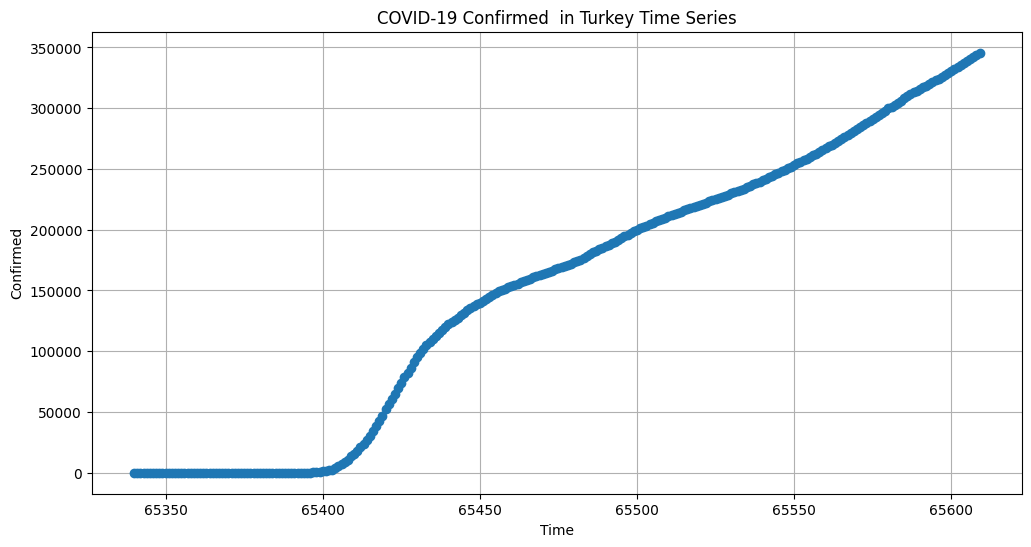

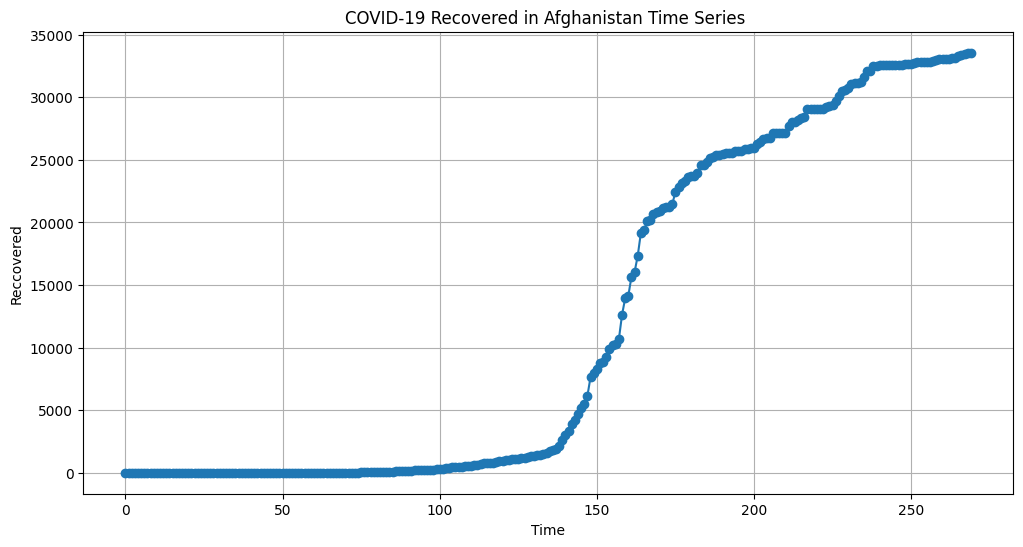

In [167]:
import matplotlib.pyplot as plt

# Zaman serisi grafiği
plt.figure(figsize=(12, 6))
plt.plot(turkey_data.index, turkey_data['Confirmed'], marker='o')
plt.title('COVID-19 Confirmed  in Turkey Time Series')
plt.xlabel('Time')
plt.ylabel('Confirmed')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(afghanistan_data.index, afghanistan_data['Recovered'], marker='o')
plt.title('COVID-19 Recovered in Afghanistan Time Series ')
plt.xlabel('Time')
plt.ylabel('Reccovered')
plt.grid(True)
plt.show()